In [1]:
import import_ipynb
import g1_generate_dictionary as g1 
import numpy as np
import csv
import g3_plot_correlation as g3
import matplotlib.pyplot as plt
import math
from scipy.stats.stats import pearsonr  
import scipy.stats as ss

importing Jupyter notebook from g1_generate_dictionary.ipynb
United States ['US']
Tanzania ['TANZANIA']
Kazakhstan ['KAZAKSTAN', 'KAZAKHSTAN']
Dominican Republic ['DOMINICAN REPUBLIC']
Guyana ['GUYANA']
G77 ['G-77/CHINA', 'for the G-77/ China', 'for the Group of 77 and China', 'G77/CHINA', 'G77 & CHINA', 'G77', 'for the G-77/China', 'G77-CHINA', 'G-77/ CHINA']
Belize ['BELIZE']
Togo ['TOGO']
Swaziland ['SWAZILAND']
Djibouti ['DJIBOUTI']
Umbrella Group ['for the Umbrella Group', 'UMBRELLA GROUP']
Gabon ['GABON']
Kyrgyz Republic ['KYRGYZSTAN']
Central African Republic ['CENTRAL AFRICAN REPUBLIC']
Norway ['NORWAY', 'NORWARY']
Mozambique ['MOZAMBIQUE']
Burundi ['BURUNDI']
Fiji ['FIJI']
Algeria ['ALGERIA']
Mountain Landlocked Developing Countries []
Congo, Democratic Rep. ['DEMOCRATIC REPUBLIC OF CONGO', 'ZAIRE', 'DRC']
Jordan ['JORDAN']
Kenya ['KENYA']
Korea, Republic ['REPUBLIC OF KOREA', 'KOREA']
Thailand ['THAILAND']
Greece ['GREECE']
EU ['EU', 'for the European Union']
COMIFAC ['COMIFA

In [2]:
def open_file(file):
    list_file = []
    f = open(file)
    for x in csv.reader(f):
        list_file.append(x)
    
    return list_file[1:]


In [3]:
def extract_gen_number(number, generated):
    g = []
    for i in range(len(generated)):
        if(generated[i][0] == str(number)):
            g.append(generated[i])
    return g

In [4]:
def extract_orig_number(number, original):
    o = []
    for i in range(len(original)):
        if(original[i][0] == str(number)):
            o.append(original[i])
    return o


In [5]:
def compute_corr_coef(number, generated, original):
    gen_num = extract_gen_number(number, generated)
    orig_num = extract_orig_number(number, original)
    x = np.zeros((1,len(gen_num)))[0]
    y = np.zeros((1,len(gen_num)))[0]
    for i in range(len(gen_num)):
        x[i] += float(gen_num[i][2])
        y[i] += float(orig_num[i][2])
        #if(gen_num[i][2] != orig_num[i][2]):
            #print(orig_num[i][1], orig_num[i][2], gen_num[i][2])
  
    x =  np.array(x).astype(np.float)
    y = np.array(y).astype(np.float)

    if(sum(x) == 0 and sum(y)==0):
        return 1


    else:
        return np.corrcoef(x,y, rowvar=True)[0][1]
        #return  pearsonr(x,y)[0]
        #return ss.spearmanr(x,y)[0]

In [6]:
def compute_corr():
    generated_occ = open_file("occurences_generated.csv")
    original_occ = open_file("occurences_original.csv")
    corr_coef = []
    list_issues = g3.find_issues_to_extract()
    x_axis = []
    y_axis = []
    k=0
    #list_test = [171,190,396,460,557,568]
    for i in range(45,594):
        if(i in list_issues):
            cc = compute_corr_coef(i, generated_occ, original_occ)
            if(not math.isnan(float(cc))):
                x_axis.append(i)
                y_axis.append(cc)
                corr_coef.append(cc)
                if(cc < 0.95):
                    k +=1
                    print(i,cc)
 
    print("Mean: ",np.mean(corr_coef))  
    print("Smaller than 0.95 : ", k)       
    return corr_coef, x_axis, y_axis


In [7]:
def compute_corr_num(number):
    generated_occ = open_file("occurences_generated.csv")
    original_occ = open_file("occurences_original.csv")
    corr_coef = []
    x_axis = []
    y_axis = []
    cc = compute_corr_coef(number, generated_occ, original_occ)
    corr_coef.append(cc)
    

    print( cc)

In [8]:
cc, x, y  = compute_corr()

50 0.9295505016987592
52 0.8145776673914112
95 0.7452606635071103
98 0.8581495397636962
169 0.7054527279711021
190 0.3976318404363966
229 0.9245138611595531
303 0.9258731335064119
313 0.9167386425352306
315 0.9182744884309101
348 0.9352923871024325
352 0.9350719302620519
393 0.9420799690347502
396 0.4438644592111774
404 0.9433228356928304
440 0.9145326266040603
455 0.9468225060607792
457 0.9360761158872224
460 0.5259343565466565
493 0.9224170816276259
495 0.7390398309540578
528 0.9487565121627629
529 0.9448277036611632
532 0.9201197464767144
536 0.9442922921289563
549 0.7982256352066076
557 0.6930932988917098
558 0.8246508307833398
568 0.5355149930876235
570 0.9245174183039764
584 0.9154553191150648
Mean:  0.9791313754840814
Smaller than 0.95 :  31


In [9]:
compute_corr_num(529)

0.9448277036611632


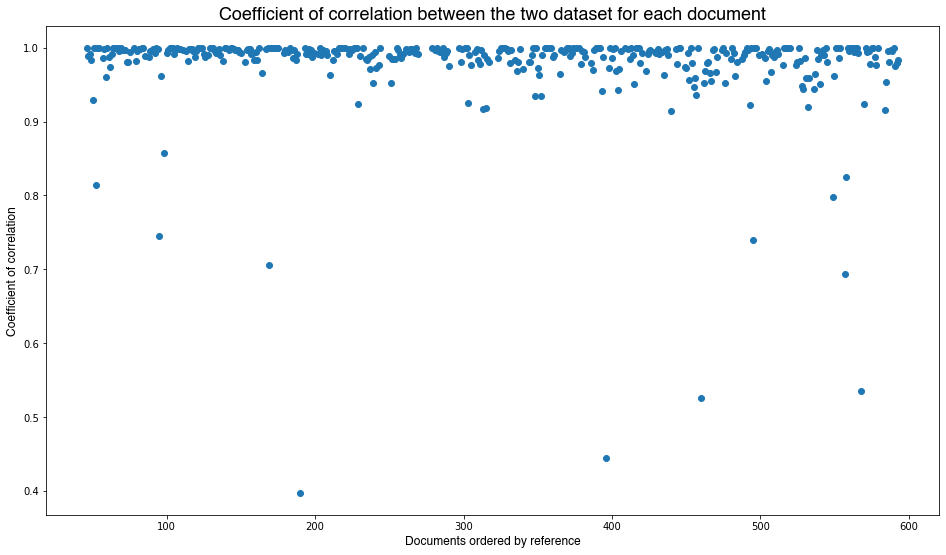

In [18]:

figsize = (16,9)

fig, ax = plt.subplots(1, 1, figsize=figsize)

csfont = {'fontname':'Helvetica','fontsize':'18' }
hfont = {'fontname':'Helvetica','fontsize':'12'}

plt.title('Coefficient of correlation between the two dataset for each document',**csfont)
plt.xlabel('Documents ordered by reference', **hfont)
plt.ylabel('Coefficient of correlation', **hfont)
plt.scatter(x,y)

plt.show()

# < 0.95

